# ¿Que vamos a ver hoy?

## Nociones de eventos y variables estadísticas

- Ejemplo discreto: DNI y cartas 
- Ejemplo continuo: largo de lápices
  
## Nociones de funciones de distribución y de densidad de distribución

- Función uniforme, continua y discreta.
- Bernoulli, discreta. 
- Binomial, discreta.
- Poisson, discreta con T y $\lambda$ parametros continuos.
- Exponencial, continua.
- Normal/gaussiana, continua.

In [1]:
import numpy as np
import seaborn as sns

In [31]:
opciones = ["par","impar"]

if np.random.random() < 0.5:
    print (opciones[0])
else:
    print (opciones[1])

par


In [46]:
def contar_n_muestras(nro_muestras, opciones = ["par","impar"], buscado = "par"):
    resultado = np.random.choice(opciones,nro_muestras)
    coincidencias = resultado == buscado
    return coincidencias.sum()
    
def hacer_n_experinmentos(nro_muestras, nro_experimentos, opciones = ["par","impar"], buscado = "par"):
    resultado = []
    for i in range(nro_experimentos):
        experimento = contar_n_muestras(nro_muestras, opciones = opciones, buscado = buscado)
        resultado.append(experimento)
    return resultado

    

In [47]:
hacer_n_experinmentos(4,10)

[2, 0, 4, 2, 3, 1, 2, 1, 2, 2]

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

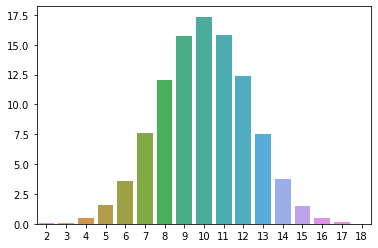

In [74]:
nro_muestras = 20
nro_experimentos = 10000
exp = hacer_n_experinmentos(nro_muestras,nro_experimentos)
unique, counts = np.unique(exp, return_counts=True)
sns.barplot(unique, counts/counts.sum()*100)

In [50]:
exp

[2, 3, 2, 2, 3, 2, 3, 1, 1, 1]

In [51]:
unique

array([1, 2, 3])

In [52]:
counts

array([3, 4, 3], dtype=int64)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

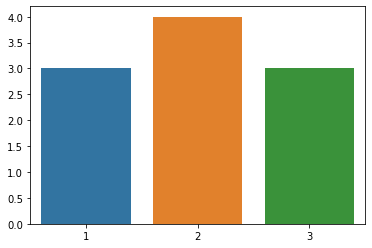

In [57]:
sns.barplot(unique, counts)

In [77]:
largos = [14.5, 14.5, 14.5, 15, 13.9, 14.3, 13.2, 17.5, 13.9, 14.7, 16.0, 14.3, 15.3, 15, 16, 15.9, 14.5, 10.2, 14.3, 14.3, 14.9, 16.6, 12.2, 12.5]

np.mean(largos)

14.5

[14.5 14.5 14.5 15.  13.9 14.3 13.2 17.5 13.9 14.7 16.  14.3 15.3 15.
 16.  15.9 14.5 10.2 14.3 14.3 14.9 16.6 12.2 12.5]


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

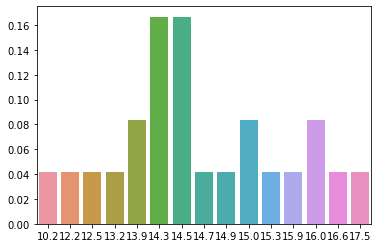

In [81]:
data = np.array(largos)
print (data)
unique, counts = np.unique(data, return_counts=True)
sns.barplot(unique, counts/counts.sum())

[10.2 12.2 12.5 13.2 13.9 13.9 14.3 14.3 14.3 14.3 14.5 14.5 14.5 14.5
 14.7 14.9 15.  15.  15.3 15.9 16.  16.  16.6 17.5]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


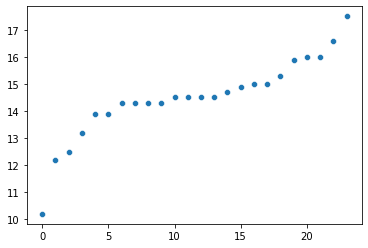

In [85]:
data.sort()
print(data)
x = np.arange(len(data))
print (x)
grafico = sns.scatterplot(x,data)

La probabilidad de que el valor este entre 12 y 13 es 8.333333333333332%


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


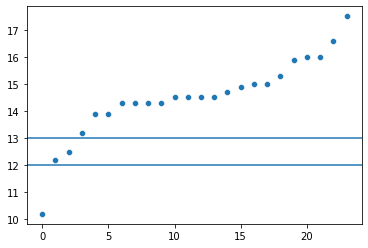

In [88]:
# Cual es la probabilidad de que un lapiz mida entre 14 y 15 cm

cota_sup = 13
cota_inf = 12

condicion = (cota_inf < data) & (data <= cota_sup)
# La probabilidad son los caso favorables sobre los totales
print (f'La probabilidad de que el valor este entre {cota_inf} y {cota_sup} es {condicion.sum()/len(condicion)*100}%')
grafico = sns.scatterplot(x,data)
grafico.axhline(cota_sup)
grafico.axhline(cota_inf)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


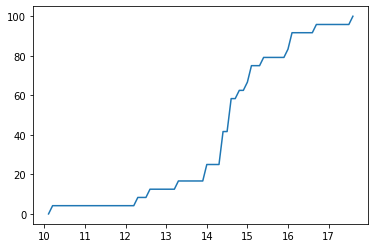

In [90]:
# Vamos a contruir la probabilidad acumulada
paso = 0.1

probabilidad_acumulada = []
limite_inf = data.min()-paso

for deslizador in np.arange(data.min()-paso,data.max()+paso,paso):
    condicion = (limite_inf < data) & (data <= deslizador)
    probabilidad_acumulada.append(condicion.sum()/len(condicion)*100)
    
grafico = sns.lineplot(np.arange(data.min()-paso,data.max()+paso,paso),probabilidad_acumulada)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


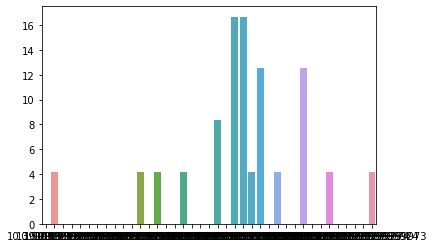

In [93]:
# Vamos a construir la densidad de probabilidad
paso = 0.2

densidad_probabilidad = []
for deslizador in np.arange(data.min()-paso,data.max()+paso,paso):
    condicion = (deslizador - paso/2 < data) & (data <= deslizador + paso/2)
    densidad_probabilidad.append(condicion.sum()/len(condicion)*100) 
    
grafico = sns.barplot(np.arange(data.min()-paso,data.max()+paso,paso),densidad_probabilidad)